## Health Information Systems and Decision Support Systems
## WPO 2: Data-driven systems  (04/03/22)
****
*Jakub Ceranka, Pieter Boonen, Panagiotis Gonidakis, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=red>
Aneruth Mohansundaram - 0573520 (VUB) <br><br>
Ishan Raychaudhuri - 0574056 (VUB)
</font>

### Goal
The goal of this practical session is to get an insight into methods and algorithms for building knowledge-based decision-support systems. Your tasks will involve designing the systems, examining the output, tuning the parameters and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook via Canvas Assignment functionality before the __11th of March, 2022, 23:59__. The grade from this practical session will contribute to your final grade. Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be), [jwuts@etrovub.be](mailto:jwuts@etrovub.be)

### Libraries

During this practical session, the following libraries will be used. You can use different version of libraries, however we recommend the following build:

- [__Scikit-fuzzy__](https://pypi.python.org/pypi/scikit-fuzzy): library for fuzzy sets and logic __V 0.3.1__ 
- [__Numpy__](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html):      library used for scientific computing containing N-dimensional arrays, functions and Fourier transform. __V 1.13.3__ 
- [__Graphviz__](https://pypi.python.org/pypi/graphviz):     Visualization of graphs. You may need to the perform installation via conda.  __V 0.8.2__ 
- [__Matplotlib__](https://matplotlib.org/users/pyplot_tutorial.html): plotting library used for the visualization of data from python. __V 2.1.0__ 
- [__Pgmpy__](http://pgmpy.org/): Module for building and performing inference on probabilistic graphical models __V 0.2.1__ 


To import any external library, you need to import it using the **import** statement followed by the name of the library and the shortcut. You can additionally check for the module version using __version__ command. Information on updating the libraries using Anaconda can be found  [here](http://conda-test.pydata.org/docs/examples/update.html).
<br><br>
If the library is not installed in your Anaconda Navigator or Python simply type in your terminal: *conda install package_name* or *pip install package_name*.

## Part 1: A fuzzy logic alert system at the pediatric ICU
At the intensive care unit of a pediatric hospital, the staff wants to implement a priority-based alert system that allows to rank the urgency of the different monitors of physiological signs of the infants. The physiological sensor outputs are combined with patient-specific information (age, history, etc,) to determine the urgency. The output of each monitor should be a value between 0 (no alert) and 100 (alert with the highest priority), allowing the output of all monitors to be ranked in terms of urgency. The responsible nurse is notified of the most urgent which needs to be addressed first. 

### Task 1: Design a monitor system for body temperature
The output of a temperature sensor should be combined with the (priorly given) age of the patient. The variables to consider are:

* Temperature
   - The temperature in degrees Celcius. 
       * Values of about 35,5 and below are `hypothermia`
       * Values of  roughly 37 are  `normal`
       * Values between roughly 37,5 and 38 are `elevated`
       * Values of around 38,5 indicate `mild fever`
       * Values of 39 and higher indicate `high fever`
       * Values outside of the range [30,44] are likely to indicate malfunctioning of the sensor
       
* Age
   - The age of the infant in months, from 0 to 36 
       * We make a distinction between newborns (0-3 months), babies (3-6 months), infants (6-12 months) and toddlers (12-36 months)

* Alert-level
   -  A value between 0 and 100
       * Five levels are distinguished: no alert, low, moderate, high, critical 


The behaviour of the monitoring system should be the following. 
    * For newborns, elevated temperature should give a moderate alert, a mild fever should correspond to a high alert, and a high fever should correspond to critical alert-level. 
    
    * Babies with a mild fever should give a moderate alarm, while high fever should be high alert. 
    
    * Infants with a mild fever should be a low priority alert, and high fever should be moderate alert. 
    
    * Toddlers with a mild and high fever both should give a low alert. 
    
    * Hypothermia should always give a high alert level, except for newborns where it should be critical.
    
    * Malfunctioning sensors should always give a moderate alert. 

The alert level should evolve continuously for ages and temperatures in the correct functioning range of the sensor, and have a logical progression for values not mentioned above. 

Use the packages *skfuzzy* and *matplotlib* to design and visualize a fuzzy logic controller. Instead of *%matplotlib inline* you can use *%matplotlib notebook*, which provide interactive plots.


### Step 1: Define and visualize the membership funtions
Use custom triangular and trapezoid membership functions for the temperature and age, and have at least 1 degree Celcius and 2 months of overlap between functions on each side, respectively. Ensure the total membership is always one. You can use an automatically generated membership function for the alert-level. Have a look at the examples for the syntax (http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html). 

In [1]:
# Importing the package
#Import required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
#Creation of the membership functions

# Generate universe variables
temperature = np.arange(0, 50, 0.5)
age = np.arange(0, 37, 1)
alert = np.arange(0, 101, 1)

# Generate fuzzy membership 

age_new = fuzz.trapmf(age, [0, 0, 2, 4])
age_baby = fuzz.trapmf(age, [2, 4, 5, 7])
age_infant = fuzz.trapmf(age, [5, 7, 11, 13])
age_todd = fuzz.trapmf(age, [11, 13, 36, 36])

tem_malfunct_low = fuzz.trapmf(temperature, [0, 0, 29.5, 30.5])
tem_hypo = fuzz.trapmf(temperature, [29.5, 30.5, 35, 36])
tem_norm = fuzz.trimf(temperature, [35, 36, 37])
tem_ele = fuzz.trimf(temperature, [36, 37, 38])
tem_mild = fuzz.trimf(temperature, [37, 38, 39])
tem_high = fuzz.trapmf(temperature, [38, 39, 43, 44])
tem_malfunct_high = fuzz.trapmf(temperature, [43, 44, 50, 50])

alert_no = fuzz.trimf(alert, [0, 0, 25])
alert_low = fuzz.trimf(alert, [0, 25, 50])
alert_mod = fuzz.trimf(alert, [25, 50, 75])
alert_high = fuzz.trimf(alert, [50, 75, 100])
alert_critical = fuzz.trimf(alert, [75, 100, 100])

In [3]:
# Create Antecedent/Consequent 

age_ant = ctrl.Antecedent(age, 'age')

age_ant["newborn"] = age_new
age_ant["babies"] = age_baby 
age_ant["infants"] = age_infant
age_ant["toddlers"] = age_todd

temperature_ant = ctrl.Antecedent(temperature, 'temperature')

temperature_ant['malfunction low'] = tem_malfunct_low
temperature_ant['hypothermia'] = tem_hypo
temperature_ant['normal'] = tem_norm
temperature_ant['elevated'] = tem_ele
temperature_ant['mild fever'] = tem_mild
temperature_ant['high fever'] = tem_high
temperature_ant['malfunction high'] = tem_malfunct_high

alert_con = ctrl.Consequent(alert, 'alert')

alert_con["no alert"] = alert_no
alert_con["low"] = alert_low
alert_con["moderate"] = alert_mod 
alert_con["high"] = alert_high
alert_con["critical"] = alert_critical

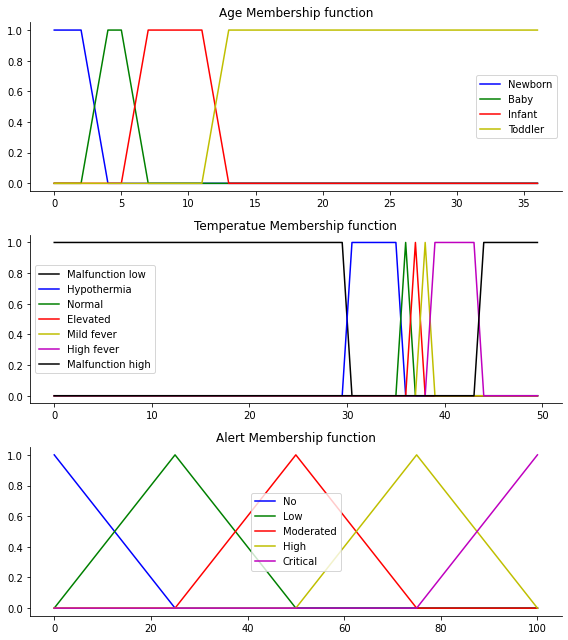

In [4]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(age, age_new, 'b', linewidth=1.5, label='Newborn')
ax0.plot(age, age_baby, 'g', linewidth=1.5, label='Baby')
ax0.plot(age, age_infant, 'r', linewidth=1.5, label='Infant')
ax0.plot(age, age_todd, 'y', linewidth=1.5, label='Toddler')
ax0.set_title('Age Membership function')
ax0.legend()

ax1.plot(temperature, tem_malfunct_low, 'k', linewidth=1.5, label='Malfunction low')
ax1.plot(temperature, tem_hypo, 'b', linewidth=1.5, label='Hypothermia')
ax1.plot(temperature, tem_norm, 'g', linewidth=1.5, label='Normal')
ax1.plot(temperature, tem_ele, 'r', linewidth=1.5, label='Elevated')
ax1.plot(temperature, tem_mild, 'y', linewidth=1.5, label='Mild fever')
ax1.plot(temperature, tem_high, 'm', linewidth=1.5, label='High fever')
ax1.plot(temperature, tem_malfunct_high, 'k', linewidth=1.5, label='Malfunction high')
ax1.set_title('Temperatue Membership function')
ax1.legend()



ax2.plot(alert, alert_no, 'b', linewidth=1.5, label='No')
ax2.plot(alert, alert_low, 'g', linewidth=1.5, label='Low')
ax2.plot(alert, alert_mod, 'r', linewidth=1.5, label='Moderated')
ax2.plot(alert, alert_high, 'y', linewidth=1.5, label='High')
ax2.plot(alert, alert_critical, 'm', linewidth=1.5, label='Critical')
ax2.set_title('Alert Membership function')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Step 2: Define the rules
Translate the desired behaviour given above, to rules for alert levels. Start by only defining those which are given. More may be needed, after inspecting the output (Step 4).

In [5]:
"""Rules
0. For newborns, elevated temperature should give a moderate alert
1. For newborns, a mild fever should correspond to a high alert
2. For newborns, a high fever should correspond to critical alert-level
3. Babies with a mild fever should give a moderate alarm 
4. Babies with high fever should be high alert
5. Infants with a mild fever should be a low priority alert, 
6. Infants with high fever should be moderate alert
7. Toddlers with a mild and high fever both should give a low alert
8. Hypothermia should always give a high alert level, except for newborns where it should be critical
9. Hypothermia and newborns should be critical
10. Malfunctioning sensors should always give a moderate alert
"""
rule0 = ctrl.Rule(antecedent=(age_ant["newborn"] & temperature_ant["elevated"]), 
                  consequent = alert_con["moderate"])

rule1 = ctrl.Rule(antecedent=(age_ant["newborn"] & temperature_ant["mild fever"]), 
                  consequent = alert_con["high"])

rule2 = ctrl.Rule(antecedent=(age_ant["newborn"] & temperature_ant["high fever"]), 
                  consequent = alert_con["critical"])

rule3 = ctrl.Rule(antecedent=(age_ant["babies"] & temperature_ant["mild fever"]), 
                  consequent = alert_con["moderate"])

rule4 = ctrl.Rule(antecedent=(age_ant["babies"] & temperature_ant["high fever"]), 
                  consequent = alert_con["high"])

rule5 = ctrl.Rule(antecedent=(age_ant["infants"] & temperature_ant["mild fever"]), 
                  consequent = alert_con["low"])

rule6 = ctrl.Rule(antecedent=(age_ant["infants"] & temperature_ant["high fever"]), 
                  consequent = alert_con["moderate"])

rule7 = ctrl.Rule(antecedent=(age_ant["toddlers"] & (temperature_ant["mild fever"] | temperature_ant["high fever"])), 
                  consequent = alert_con["low"])

rule8 = ctrl.Rule(antecedent=((~ age_ant["newborn"]) & temperature_ant["hypothermia"]), 
                  consequent = alert_con["high"])

rule9 = ctrl.Rule(antecedent=(age_ant["newborn"] & temperature_ant["hypothermia"]), 
                  consequent = alert_con["critical"])

rule10 = ctrl.Rule(antecedent=(temperature_ant["malfunction low"] | (temperature_ant["malfunction high"])), 
                  consequent = alert_con["moderate"])

rule11 = ctrl.Rule(antecedent=(temperature_ant['normal'] | (age_ant["toddlers"] & temperature_ant['elevated']) | (age_ant['infants'] & temperature_ant['elevated'])), 
                  consequent=alert_con['no alert'])

rule12 = ctrl.Rule(antecedent=((age_ant['babies'] & temperature_ant['elevated'])), 
                  consequent = alert_con["low"])


### Step 3: Load and test the system
Make a control system by loading the rules. Now verify the output for particular inputs using the control system simulation. Output the alert level, and visualize the alert membership. __Tip:__ use the functions ctrl.ControlSystemSimulation and alert.view(). 


22.023809523809522


/Users/aneruthmohanasundaram/Documents/GitHub/Clinical-Decision-Support-System/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


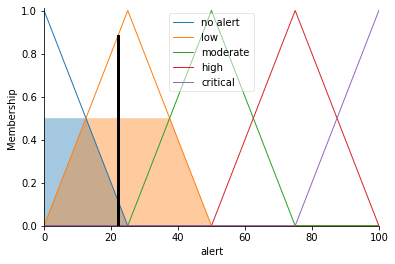

In [6]:
alerting_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

alerting = ctrl.ControlSystemSimulation(alerting_ctrl)
alerting.input['temperature'] = 37.5
alerting.input['age'] = 10
alerting.compute()

print(alerting.output['alert'])
alert_con.view(sim=alerting)

### Step 4: Test the system

Make plots of the evolution of the alerts, for the following cases

    * For an age of 1 month, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For an age of 8 months, the alert level as a function of the temperature [28, 50] with increments of 0.5.
    * For a temperature of 38.5 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    * For a temperature of 40 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
    
Add rules for cases not currently covered (and which may give errors due to sparsity in the inference engine).


        

In [39]:
def plotGraph(type,x):
    """A unique graph plot function

    Args:
        type (String): Z#
        x (ndArray): Numpy array
    """
    y = []
    alerting_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
    alerting = ctrl.ControlSystemSimulation(alerting_ctrl)

    for i in x:
        alerting.input['temperature'] = i
        alerting.input['age'] = 1
        alerting.compute()
        y.append(alerting.output['alert'])
    if type == '1':
        title = 'Alert level as a function of temperature from 28°C to 50 °C for 1 month of age'
    elif type == '8':
        title = 'Alert level as a function of temperature from 28°C to 50 °C for 8 months of age'
    
    plt.figure(figsize=(8, 5))
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel('Temperature [°C]')
    plt.ylabel('Alert level')

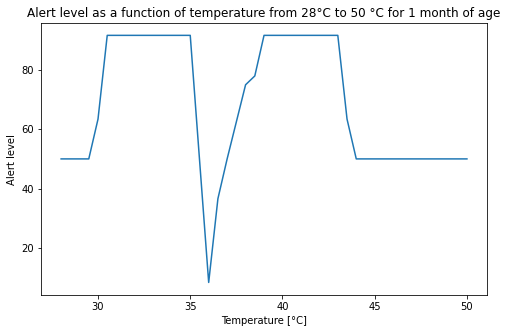

In [40]:
# For an age of 1 month, the alert level as a function of the temperature [28, 50] with increments of 0.5.
x = np.arange(28, 50.5, 0.5)
plotGraph('1',x)

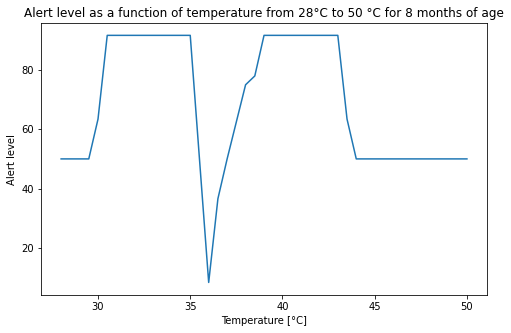

In [41]:
# For an age of 8 months, the alert level as a function of the temperature [28, 50] with increments of 0.5.
x = np.arange(28, 50.5, 0.5)
plotGraph('8',x)

In [47]:
def plotTempAgeGraph(temp,ageList):
    """A graph to plot the alert level for a given temperature and age criteria.

    Args:
        temp (int): Temperture
        ageList (ndAray): numpy array
    """
    y = []
    alerting_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
    alerting = ctrl.ControlSystemSimulation(alerting_ctrl)

    for i in ageList:
        alerting.input['temperature'] = temp
        alerting.input['age'] = i
        alerting.compute()
        y.append(alerting.output['alert'])
    
    if temp == 38.5:
        title = 'Alert level as a function of the age from 1 to 36 months for a temperture of 38.5 °C'
    elif temp == 40:
        title = 'Alert level as a function of the age from 1 to 36 months for a temperture of 40 °C'

    plt.figure(figsize=(8, 5))
    plt.plot(ageList,y)
    plt.title(title)
    plt.xlabel('Age [months]')
    plt.ylabel('Alert level')

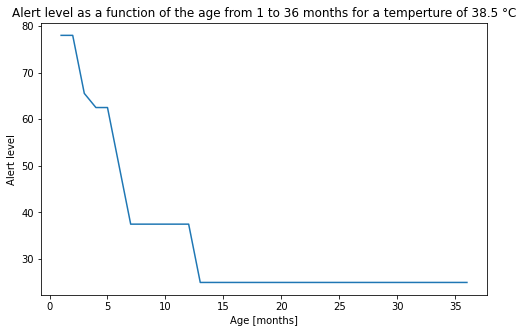

In [48]:
# For a temperature of 38.5 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
plotTempAgeGraph(38.5,np.arange(1, 37, 1))

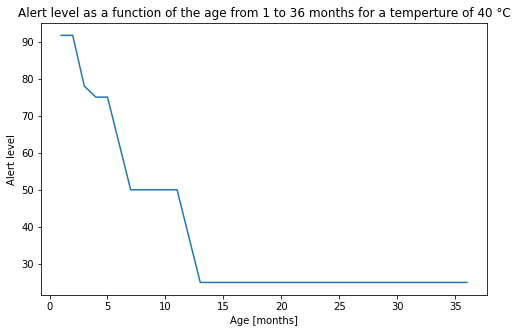

In [49]:
# For a temperature of 40 degrees Celcius, the alert level as a function of the age [1,36] with increments of 1.
plotTempAgeGraph(40,np.arange(1, 37, 1))

### Step 5:  Visualize the output and tune the system

Make a 3D surface plot (function ***plot_surface()***) with the output of the alert system for ages [1,36] and temperatures [28, 46]. Tune the system such that the alert level is always within the no-alert range for temperatures in the range [36.5, 37.5]. You can adjust the system by modifying the membership functions, changing the rules or inference system; till you obtain the desired behaviour. Modifications towards Step 1 are allowed here.

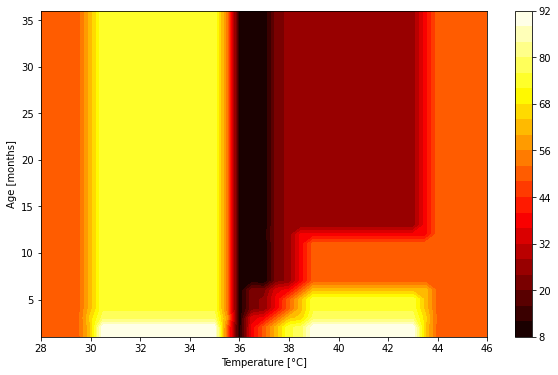

In [11]:
temperatures_range = np.arange(28, 46.5, 0.5)
ages_range  = np.arange(1, 37, 1)
z = []

alerting_ctrl = ctrl.ControlSystem([rule0, rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
alerting = ctrl.ControlSystemSimulation(alerting_ctrl)

X, Y = np.meshgrid(temperatures_range, ages_range)

alerting = ctrl.ControlSystemSimulation(alerting_ctrl)
alerting.input['temperature'] = X
alerting.input['age'] = Y
alerting.compute()
z = alerting.output['alert']

plt.figure(figsize=(10, 6))
plt.xlabel('Temperature [°C]')
plt.ylabel('Age [months]')

plt.contourf(X, Y, z, 20, cmap='hot')
plt.colorbar()

## Part 2: A Bayesian belief network for lung cancer
In this exercise we will translate clinical knowledge into a bayesian belief network (the percentages given below are fictive). The goal is to compute the probabilities of presence of cancer, given certain information about the patient. Additionally, we wish to determine the impact on diagnostic tests, when prior information about the patient is given. 

The changes for lung cancer for someone living a healthy life in a healthy surrounding are slim (3%). They are mainly influenced by smoking (7%), being exposed to pollution (6%), or both (9%). Patients over 50 (about 30% of the population) have the biggest chance of being exposed to pollution (60%), which is significantly more than patients with ages below 50 (10%). Patients over 50 are also more likely to smoke. In fact, one in four males over 50 still smokes, while only 13% of females over 50 smokes. With respect to the population with ages below 50 the difference is remarkable: 20% and 7% for males and females, respectively.  

Two tests are primarily done to determine lung cancer: an X-ray scan of the chest, and a Serum Calcium test. Lung cancer has about 85% chance of getting detected using an X-ray. In rare cases (5%), X-ray leads to a positive reading for cases where there is no tumour present. This can be verified using CT imaging. The serum calcium test is cheap, but not very reliable for lung cancer: only 70% sensitivity and a false positive result in about 35% of the negative cases.


### Step 1: Design the probalistic graphical model 
Use the package graphviz to draw the bayesian belief network and visualize the network. For now, focuss on dependencies between the different criteria by establishing edges between the different nodes. You should end up with a graph of seven nodes. 


In [52]:
from graphviz import Digraph as dia
import matplotlib.pyplot as plt

#Define the network
dot = dia(comment='Chances for lung cancer')
dot.node('C', 'Lung cancer')
dot.node('G', 'Gender')
dot.node('A', 'Age')
dot.node('S', 'Smoke')
dot.node('P', 'Pollution')
dot.node('X', 'X-Ray')
dot.node('T', 'Serum Calcium')

dot.edges(['AS', 'GS', 'AP', 'SC', 'PC', 'CX','CT'])

#Render the network
dot.render('test-output/round-table.gv', view=True)

'test-output/round-table.gv.pdf'

### Step 2: Build the probabilistic graphical model
Now use the package pgmpy to build the computational probabilistic graphical model, named cancer_model, by specifying the edges. You can verify the model you defined using the cancer_model.edges() and cancer_model.nodes() commands.

In [13]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD 

# Build the computational probabilistic model
cancer_model = BayesianModel([('A', 'S'), ('G', 'S'), ('A', 'P'), ('S', 'C'), ('P', 'C'), ('C', 'X'), ('C', 'T')]) 

/Users/aneruthmohanasundaram/Documents/GitHub/Clinical-Decision-Support-System/venv/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [14]:
print(f'Edges of our model are  {cancer_model.edges()}  and nodes of our model are {cancer_model.nodes()}')

Edges of our model are  [('A', 'S'), ('A', 'P'), ('S', 'C'), ('G', 'S'), ('P', 'C'), ('C', 'X'), ('C', 'T')]  and nodes of our model are ['A', 'S', 'G', 'P', 'C', 'X', 'T']


### Step 3: Define the conditional probability distributions (CPDs)
Using the knowledge given above, fill in the conditional probabilities for each node using the TabularCPD command. Finding out the order of the probabilities can be a bit tricky. Have a look at http://pgmpy.org/factors.html for an example. The probability of male vs female is 50%.

In [15]:
#Fill the probqbilistic model with the conditional probabilities for each node
age = TabularCPD('A', 2,values=[[0.3],[0.7]])
print('Age: 0 >= 50; 1 <= 50')
print(age)

gender = TabularCPD('G', 2,values=[[0.5],[0.5]])
print('\nGender: 0=Male ; 1=Female')
print(gender)

smoke = TabularCPD('S', 2,values=[[0.25, 0.2, 0.13, 0.07],[0.75, 0.8, 0.87, 0.93]], evidence=['G', 'A'], evidence_card=[2,2])
print('\n0=Smoke   1=No smoke')
print(smoke)

pollution = TabularCPD('P', 2,values=[[0.6, 0.1], [0.4, 0.9]], evidence=['A'], evidence_card=[2])
print('\n0=Pollution   1=No pollution')
print(pollution)

cancer = TabularCPD('C', 2,values=[[0.09, 0.07, 0.06, 0.03], [0.91, 0.93, 0.94, 0.97]], evidence=['S','P'], evidence_card=[2,2])
print('\n0=Cancer True   1=No cancer')
print(cancer)


serum = TabularCPD('T', 2,values=[[0.7, 0.35], [0.3, 0.65]], evidence=['C'], evidence_card=[2])
print('\nC: 0=Cancer True   1=No cancer')
print('T: 0=Positive Serum   1=Negative Serum')
print(serum)

xray = TabularCPD('X', 2,values=[[0.85, 0.05], [0.15, 0.95]], evidence=['C'], evidence_card=[2])
print('\nC: 0=Cancer True   1=No cancer')
print('X: 0=Positive XRay   1=Negative XRay')
print(xray)


Age: 0 >= 50; 1 <= 50
+------+-----+
| A(0) | 0.3 |
+------+-----+
| A(1) | 0.7 |
+------+-----+

Gender: 0=Male ; 1=Female
+------+-----+
| G(0) | 0.5 |
+------+-----+
| G(1) | 0.5 |
+------+-----+

0=Smoke   1=No smoke
+------+------+------+------+------+
| G    | G(0) | G(0) | G(1) | G(1) |
+------+------+------+------+------+
| A    | A(0) | A(1) | A(0) | A(1) |
+------+------+------+------+------+
| S(0) | 0.25 | 0.2  | 0.13 | 0.07 |
+------+------+------+------+------+
| S(1) | 0.75 | 0.8  | 0.87 | 0.93 |
+------+------+------+------+------+

0=Pollution   1=No pollution
+------+------+------+
| A    | A(0) | A(1) |
+------+------+------+
| P(0) | 0.6  | 0.1  |
+------+------+------+
| P(1) | 0.4  | 0.9  |
+------+------+------+

0=Cancer True   1=No cancer
+------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| P    | P(0) | P(1) | P(0) | P(1) |
+------+------+------+------+------+
| C(0) | 0.09 | 0.07 | 0.06 | 0.03 |
+---

### Step 4: Associate the CPDs to the model structure, and test the model
Next, associate the CPDs to the model structure and check for consistency.

Perform inference on you model using VariableElimination and verify the outcome is intuitively correct for all nodes (e.g. chance of cancer should increase given evidence of smoking, etc.). Adjust the definition of the CPDs if needed. 

In [17]:
#Model creation and checking consinstency

from pgmpy.inference import VariableElimination

cancer_model.add_cpds(age, gender, smoke, pollution, cancer, serum, xray)
cancer_model.check_model()

True

In [19]:
# Perform inference on the model for each node
#
# Remember C(0) > Subject has cancer
# Remember C(1) > Subject has no cancer

inference = VariableElimination(cancer_model)

young_query = inference.query(variables=['C'], evidence={'A': 0}, show_progress=False)
print('Age: >= 50')
print(young_query)

old_query = inference.query(variables=['C'], evidence={'A': 1}, show_progress=False)
print('\nAge: <= 50')
print(old_query)

male_query = inference.query(variables=['C'], evidence={'G': 0}, show_progress=False)
print('\nMale')
print(male_query)

female_query = inference.query(variables=['C'], evidence={'G': 1}, show_progress=False)
print('\nFemale')
print(female_query)

smoking_query = inference.query(variables=['C'], evidence={'S': 0}, show_progress=False)
print('\nSmoker')
print(smoking_query)

non_smoking_query = inference.query(variables=['C'], evidence={'S': 1}, show_progress=False)
print('\nNon Smoker')
print(non_smoking_query)

pollution_query = inference.query(variables=['C'], evidence={'P': 0}, show_progress=False)
print('\nPollution')
print(pollution_query)

non_pollution_query = inference.query(variables=['C'], evidence={'P': 1}, show_progress=False)
print('\nNon Pollution')
print(non_pollution_query)

pos_xray_query = inference.query(variables=['C'], evidence={'X': 0}, show_progress=False)
print('\nPositive X-ray')
print(pos_xray_query)

neg_xray_query = inference.query(variables=['C'], evidence={'X': 1}, show_progress=False)
print('\nNegative X-ray')
print(neg_xray_query)

pos_serum_query = inference.query(variables=['C'], evidence={'T': 0}, show_progress=False)
print('\nPositive Serum Calcium test')
print(pos_serum_query)

neg_serum_query = inference.query(variables=['C'], evidence={'T': 1}, show_progress=False)
print('\nNegative Serum Calcium test')
print(neg_serum_query)

Age: >= 50
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0545 |
+------+----------+
| C(1) |   0.9455 |
+------+----------+

Age: <= 50
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0383 |
+------+----------+
| C(1) |   0.9617 |
+------+----------+

Male
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0455 |
+------+----------+
| C(1) |   0.9545 |
+------+----------+

Female
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0407 |
+------+----------+
| C(1) |   0.9593 |
+------+----------+

Smoker
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0758 |
+------+----------+
| C(1) |   0.9242 |
+------+----------+

Non Smoker
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0373 |
+------+----------+
| C(1) |   0.9627 |
+------+----------+

Pollution
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0652 |
+------+----

### Step 5: Use your model to compute probabilities and answer questions

    * Whithout any information about the patient, what are the chances of having lung cancer, a positive X-ray and a positive serum Calcium test. Explain the discrepancy.  

In [22]:
print('The chances of having lung cancer without any informacion of the patient are:')
c_query = inference.query(variables=['C'], show_progress=False)
print(c_query)

print('\nThe chances of having a positive X-Ray without any informacion of the patient are:')
x_query = inference.query(variables=['X'], show_progress=False)
print(x_query)

print('\nThe chances of having a positive serum test without any informacion of the patient are:')
t_query = inference.query(variables=['T'], show_progress=False)
print(t_query)

The chances of having lung cancer without any informacion of the patient are:
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0431 |
+------+----------+
| C(1) |   0.9569 |
+------+----------+

The chances of having a positive X-Ray without any informacion of the patient are:
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.0845 |
+------+----------+
| X(1) |   0.9155 |
+------+----------+

The chances of having a positive serum test without any informacion of the patient are:
+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.3651 |
+------+----------+
| T(1) |   0.6349 |
+------+----------+


- ***Lung cancer has a 4.31 percent probability of occurring without the patient's knowledge. Because the percentage of people under 50 is higher (70 percent), and those are less exposed to pollution, this value is closer to the 3% that represented the chances of lung cancer with a healthy lifestyle (10 percent ). Simultaneously, the percentage of smokers in both age groups is below 25%, implying that in the worst-case scenario, 75% of the population does not smoke. We can deduce from these figures that the majority of the population leads a healthy lifestyle.***

- ***Without any information from the patient, the chances of getting a favorable X-Ray are 8,45 percent. This makes sense because it's closer to the 5% of cases where a positive result is obtained without the presence of cancer, but it's also influenced by the likelihood that the patient has a risk factor.***

- ***The chances of having a positive serum test without any informacion of the patient are: 36,51%.***

***The discrepancy between the three values is due to their internal condicionants and the lack of information about the patient***

    * What are the probabilities in case we have evidence about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the first case.  

In [23]:
print('The chances of having lung cancer given that the patient is >=50 and Smoker are:')
c_query = inference.query(variables=['C'], evidence={'A': 0, 'S': 0}, show_progress=False)
print(c_query)

print('\nThe chances of having a positive X-Ray given that the patient is >=50 and Smoker are:')
x_query = inference.query(variables=['X'], evidence={'A': 0, 'S': 0}, show_progress=False)
print(x_query)

print('\nThe chances of having a positive serum test given that the patient is >=50 and Smoker are:')
t_query = inference.query(variables=['T'], evidence={'A': 0, 'S': 0}, show_progress=False)
print(t_query)

The chances of having lung cancer given that the patient is >=50 and Smoker are:
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.0820 |
+------+----------+
| C(1) |   0.9180 |
+------+----------+

The chances of having a positive X-Ray given that the patient is >=50 and Smoker are:
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.1156 |
+------+----------+
| X(1) |   0.8844 |
+------+----------+

The chances of having a positive serum test given that the patient is >=50 and Smoker are:
+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.3787 |
+------+----------+
| T(1) |   0.6213 |
+------+----------+


***Because we included the requirements of age > 50 and smoking, all probability have increased. These two disorders raise the risk of lung cancer and, as a result, the likelihood of testing positive or being diagnosed with cancer.***

    * What are the probabilities in case we have evidence of cancer (but not about the about the age and smoking behaviour of the patient)? Explain the difference with the previous cases.  

In [24]:
print('The chances of having a positive X-Ray given that the patient has cancer are:')
x_query = inference.query(variables=['X'], evidence={'C': 0}, show_progress=False)
print(x_query)

print('\nThe chances of having a positive serum test given that the patient has cancer are:')
t_query = inference.query(variables=['T'], evidence={'C': 0}, show_progress=False)
print(t_query)

The chances of having a positive X-Ray given that the patient has cancer are:
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.8500 |
+------+----------+
| X(1) |   0.1500 |
+------+----------+

The chances of having a positive serum test given that the patient has cancer are:
+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.7000 |
+------+----------+
| T(1) |   0.3000 |
+------+----------+


***We cannot evaluate the probability of having cancer conditioned by having cancer because the system throws an error, evidently, this probability is 100%.***

***In the case of the X-Ray and the serum test, we obtain the same results as the conditional probabilities introduced in the creation of the model since this was the infomation provided.***

***Compared to the previous cases, the probabilities of positive results in the test is the highest because in this situation we are sure that the patient has cancer.***


    * What are the probabilities in case we have evidence of cancer, and about the age (>50) and smoking behaviour (smoker) of the patient? Explain the difference with the previous cases.  

In [25]:
print('The chances of having a positive X-Ray given that the patient has cancer, is >=50 and Smoker are:')
x_query = inference.query(variables=['X'], evidence={'A': 0, 'S': 0, 'C':0}, show_progress=False)
print(x_query)

print('\nThe chances of having a positive serum given that the patient has cancer, is >=50 and Smoker are:')
t_query = inference.query(variables=['T'], evidence={'A': 0, 'S': 0, 'C':0}, show_progress=False)
print(t_query)

The chances of having a positive X-Ray given that the patient has cancer, is >=50 and Smoker are:
+------+----------+
| X    |   phi(X) |
+======+==========+
| X(0) |   0.8500 |
+------+----------+
| X(1) |   0.1500 |
+------+----------+

The chances of having a positive serum given that the patient has cancer, is >=50 and Smoker are:
+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.7000 |
+------+----------+
| T(1) |   0.3000 |
+------+----------+


***Finally in this case, we obtain the same results as in the previous one. This result proves that, once  the patient has cancer, the age or lifestyle of the patient doesn't influence the results of the test. That is to say, the age and smoking habits are antecedentes of having cancer.***